## カオス・フラクタルのサンプル

計算途中にオーバーフローのワーニングは出るが、とりあえず結果は出力される

/home/hiro/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in square
  # This is added back by InteractiveShellApp.init_path()
/home/hiro/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in subtract
  # This is added back by InteractiveShellApp.init_path()
/home/hiro/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
/home/hiro/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in square
  del sys.path[0]
/home/hiro/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less
  del sys.path[0]


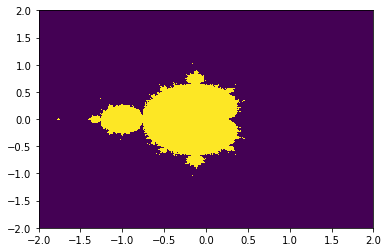

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

N, M = 50, 500

def mandel(X, Y):
    a, b = [0] * 2
    for i in range(N):
        a, b = a**2 - b**2 + X, 2 * a * b + Y

    return a**2 + b**2 < 4

x, y = [np.linspace(-2, 2, M)] * 2
X, Y = np.meshgrid(x, y)
plt.pcolor(X, Y, mandel(X, Y))
plt.show()

Logistic写像

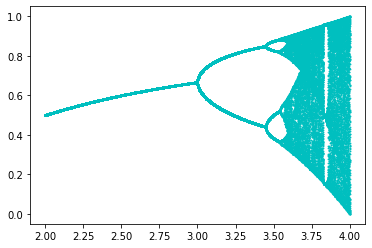

In [2]:
def logistic(a):
    x = [0.8]
    for i in range(400):
        x.append(a * x[-1] * (1 - x[-1]))
    return x[-100:]

for a in np.linspace(2.0, 4.0, 1000):
    x = logistic(a)
    plt.plot([a]*len(x), x, "c.", markersize=1.7)

plt.show()

Duffing振動子

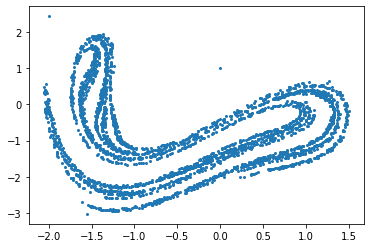

In [3]:
from scipy.integrate import odeint, simps

def duffing(var, t, gamma, a, b, F0, omega, delta):
    """
    var = [x, p]
    dx/dt = p
    dp/dt = -gamma*p + 2*a*x - 4*b*x**3 + F0*cos(omega*t + delta)
    """
    x_dot = var[1]
    p_dot = -gamma * var[1] + 2 * a * var[0] - 4 * b * var[0]**3 + F0 * np.cos(omega * t + delta)

    return np.array([x_dot, p_dot])

# parameter
F0, gamma, omega, delta = 10, 0.1, np.pi/3, 1.5*np.pi
a, b = 1/4, 1/2
var, var_lin = [[0, 1]] * 2

#timescale
t = np.arange(0, 20000, 2*np.pi/omega)
t_lin = np.linspace(0, 100, 10000)

# solve
var = odeint(duffing, var, t, args=(gamma, a, b, F0, omega, delta))
var_lin = odeint(duffing, var_lin, t_lin, args=(gamma, a, b, F0, omega, delta))

x, p = var.T[0], var.T[1]
x_lin, p_lin = var_lin.T[0], var_lin.T[1]

plt.plot(x, p, ".", markersize=4)
plt.show()

３体問題

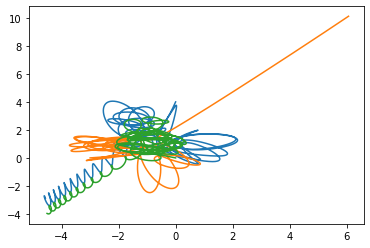

In [4]:
def manybody(var, t, m3, m4, m5, G):
    """
    var = [x3, y3, x3_dot, y3_dot, x4, y4, x4_dot, y4_dot, x5, y5, x5_dot, y5_dot]
    dx3/dt = p3
    dpx3/dt = -2*G*m3*x3(m4*(r34)**-1.5 + m5*(r35)**-1.5)
    dy3/dt = p3
    dpy3/dt = -2*G*m3*y3(m4*(r34)**-1.5 + m5*(r35)**-1.5)
    ...
    """

    def r(x1, y1, x2, y2):
        return np.sqrt((x1 - x2)**2 + (y1- y2)**2)**-3

    # (x3, y3)
    x3 = var[2]
    px3 = -G * (m4 * r(var[0], var[1], var[4], var[5]) * (var[0] - var[4]) + m5 * r(var[0], var[1], var[8], var[9]) * (var[0] - var[8]))
    y3 = var[3]
    py3 = -G * (m4 * r(var[0], var[1], var[4], var[5]) * (var[1] - var[5]) + m5 * r(var[0], var[1], var[8], var[9]) * (var[1] - var[9]))


    # (x4, y4)
    x4 = var[6]
    px4 = -G * (-m3 * r(var[4], var[5], var[0], var[1]) * (var[0] - var[4]) + m5 * r(var[4], var[5], var[8], var[9]) * (var[4] - var[8]))
    y4 = var[7]
    py4 = -G * (-m3 * r(var[4], var[5], var[0], var[1]) * (var[1] - var[5]) + m5 * r(var[4], var[5], var[8], var[9]) * (var[5] - var[9]))


    # (x5, y5)
    x5 = var[10]
    px5 = -G * (-m3 * r(var[8], var[9], var[0], var[1]) * (var[0] - var[8]) - m4 * r(var[8], var[9], var[4], var[5]) * (var[4] - var[8]))
    y5 = var[11]
    py5 = -G * (-m3 * r(var[8], var[9], var[0], var[1]) * (var[1] - var[9]) - m4 * r(var[8], var[9], var[4], var[5]) * (var[5] - var[9]))


    return np.array([x3, y3, px3, py3, x4, y4, px4, py4, x5, y5, px5, py5])



m3, m4, m5 = 3, 4, 5
G = 1
var = np.array([0, 4, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0])
t = np.linspace(0, 70, 3e7)

var = odeint(manybody, var, t, args=(m3, m4, m5, G), full_output=False)

plt.plot(var[:, 0][::1000], var[:, 1][::1000], label="3")
plt.plot(var[:, 4][::1000], var[:, 5][::1000], label="4")
plt.plot(var[:, 8][::1000], var[:, 9][::1000], label="5")
plt.show()